
### Qualidade dos dados: limpo ###
Treinando com 1000 exemplos


c:\Users\emanu\Documents\Trabalho do Gustavo\icctrab\MLP_Backpropagation_Projeto\.venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Treinando com 5000 exemplos
Treinando com 10000 exemplos
Treinando com 30000 exemplos

### Qualidade dos dados: ruidoso ###
Treinando com 1000 exemplos
Treinando com 5000 exemplos
Treinando com 10000 exemplos
Treinando com 30000 exemplos


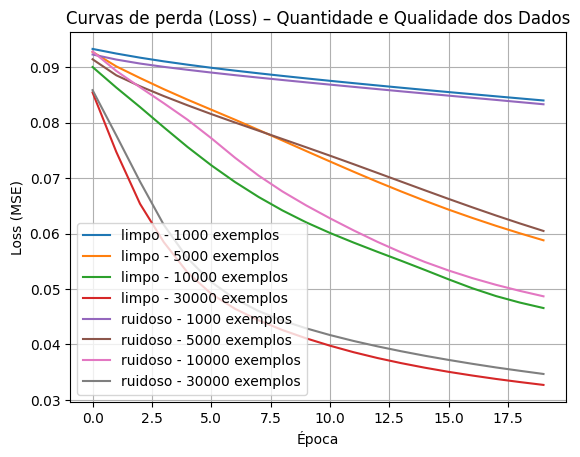

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import MeanSquaredError

# Carregar dados e normalizar
(x_train, y_train), (_, _) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)

# Função para adicionar ruído gaussiano (opcional)
def adicionar_ruido(X, ruido_std=0.1):
    ruido = np.random.normal(loc=0.0, scale=ruido_std, size=X.shape)
    X_noisy = X + ruido
    X_noisy = np.clip(X_noisy, 0., 1.)  # garantir que fique entre 0 e 1
    return X_noisy

# Tamanhos diferentes para testar
tamanhos = [1000, 5000, 10000, 30000]

# Qualidade dos dados: 'limpo' ou 'ruidoso'
qualidades = ['limpo', 'ruidoso']

def build_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(64, activation='relu', kernel_initializer=GlorotUniform(seed=0)),
        Dense(10, activation='softmax')
    ])
    return model

loss_fn = MeanSquaredError()
results = {}

for qualidade in qualidades:
    print(f"\n### Qualidade dos dados: {qualidade} ###")
    for n in tamanhos:
        print(f"Treinando com {n} exemplos")
        
        x_subset = x_train[:n]
        y_subset = y_train[:n]
        
        if qualidade == 'ruidoso':
            x_subset = adicionar_ruido(x_subset, ruido_std=0.1)
        
        model = build_model()
        model.compile(optimizer=SGD(learning_rate=0.01),
                      loss=loss_fn,
                      metrics=['mse'])
        
        history = model.fit(x_subset, y_subset, epochs=20, verbose=0)
        loss_curve = history.history['loss']
        
        results[(qualidade, n)] = loss_curve
        
        plt.plot(loss_curve, label=f'{qualidade} - {n} exemplos')

plt.title('Curvas de perda (Loss) – Quantidade e Qualidade dos Dados')
plt.xlabel('Época')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()
